# Lorenzo Bussotti project: data manipulation and visualization


Course: data science 


Online school: 'Start2Impact'


Question: is there a correlation between the victims killed by police and the rise of racism in the USA?


In order to unravel the possible racial bias, I am going to use the dataset made by Washingtion Post concerning the fatal police shoots during the period 2015-2021 in the United States. This dataset has been created after Micheal Brown kill in Ferguson, which gave birth to Black Lives Matter movement.
Furthermore, I'll be using others dataset such those on the percentage of high school completion, the rate of poverty, the 2016 US election and lastly the one about race and age by state.

Preface: most of the scientific community agrees on the evidence that human races don't genetically exist.
The genetic difference were found at the individual level (85%) and cannot be related to population mutations (only 15%).
Indeed, race is a preconcept and a statement that may defines cultural differences among groups of people, as this article explains:
https://www.eurekalert.org/pub_releases/1998-10/WUiS-GSRD-071098.php#

Despite this relevant evidence, for an easier understanding of the analysis, I will keep the name 'race' to indicate that variable.

My work is going to focus on the possible bias that US policemen may have shown in their actions!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 


In [4]:
os.chdir(r'../data_folder')

Down here I upload the main dataset and print the informations

In [238]:
#first I import the dataset using the "read csv" pandas function
kills = pd.read_csv('fatal_police_shootings_data.csv', 
                 parse_dates=True,
                 index_col='date') # indexing the dates

#then I visualize the first 5 rows
kills.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
date,,,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [74]:
kills.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6061 entries, 2015-01-02 to 2021-02-16
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6061 non-null   int64  
 1   name                     5844 non-null   object 
 2   manner_of_death          6061 non-null   object 
 3   armed                    5853 non-null   object 
 4   age                      5797 non-null   float64
 5   gender                   6060 non-null   object 
 6   race                     5477 non-null   object 
 7   city                     6061 non-null   object 
 8   state                    6061 non-null   object 
 9   signs_of_mental_illness  6061 non-null   bool   
 10  threat_level             6061 non-null   object 
 11  flee                     5713 non-null   object 
 12  body_camera              6061 non-null   bool   
 13  longitude                5767 non-null   float64
 14  latitu

In [239]:
#replace the abbreviation with the whole name
kills['race'] = kills['race'].replace(['B','A', 'W', 'O', 'H', 'N'], 
                                ['Black', 'Asian', 'White', 'Other', 'Hispanic', 'Native America'])

Let's define a time series of the people killed by the police until the end of 2020.

The figure 1 shows how the total kills have dropped in the 2016, to extremely rise in 2017.
In the years 2018, 2019 and 2020 the kills have increased, even if not so drastically.

Text(0.5, 1.0, 'Figure 1: time series of total murders by police')

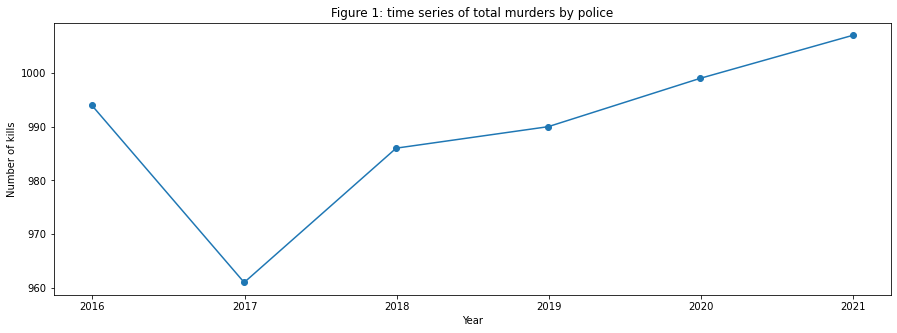

In [12]:
grouped = kills.groupby(['date'])['state'].count()# how many kills each day
kills_year = grouped.resample('Y').sum() #Let's sum the numbers obtained for each year
plt.figure(figsize=(15,5))
plt.plot(kills_year[:'2020'], marker='o',label='Number of kills at the end of the year')
plt.ylabel('Number of kills')
plt.xlabel('Year')
plt.title('Figure 1: time series of total murders by police')

Down here (figure 2), the time series about 'races' kills trade.

The supposed racial prejudge of police against blacks is not evident. 

In [8]:
k= pd.get_dummies(kills.race) #create a new DF with only the count of kills for each race
kills_1= pd.merge(kills,k, on='date')

In [9]:
kills_1= kills_1.reset_index()
kills_1['year'] = pd.DatetimeIndex(kills_1['date']).year

Text(0, 0.5, 'kills')

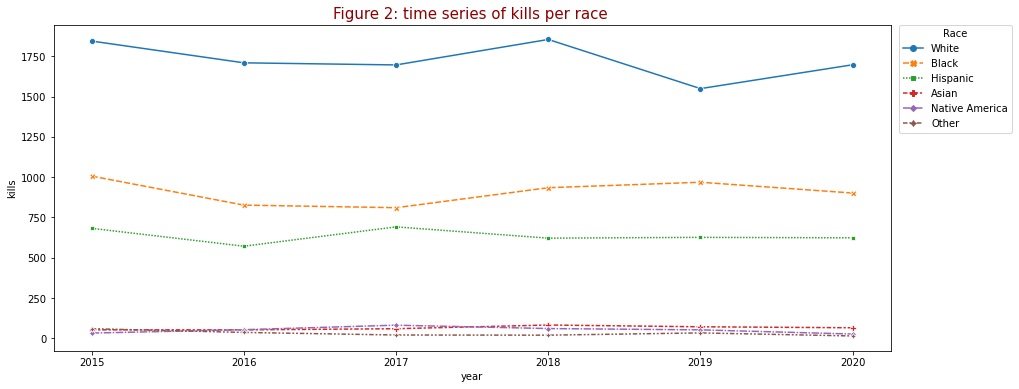

In [16]:
group = kills_1.groupby(['year']).aggregate(np.sum)[:-1]#group the dataset by the year. Remove the current year (2021)
plt.figure(figsize=(15,6))
#represent the time series of each 'race'
sns.lineplot(data=group[['White', 'Black', 'Hispanic', 'Asian', 'Native America', 'Other']], markers=True)
plt.title('Figure 2: time series of kills per race ', color="darkred",fontsize = 15)
plt.legend(title='Race', bbox_to_anchor=(1.01, 1),borderaxespad=0) #move the legend outside the figure
plt.ylabel('kills')

Now count how many deaths per 'race'!

What do we get from the figure 3? That people with white skin have been the most killed by police.
However, these are absolute numbers: I should relate the kills with the total population for each group.

C:\Users\busse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Figure 3: total number of kills per race')

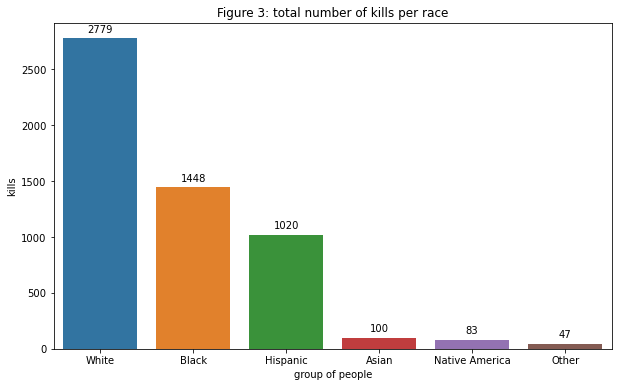

In [8]:
#order it in term of number of kills
order_by_group = kills['race'].value_counts().index
label_race = kills['race'].value_counts(normalize=True).round(decimals=3)
plt.figure(figsize=(10,6))
splot = sns.countplot('race', data=kills, order=order_by_group) 
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points') #show the value above the bars
plt.xlabel('group of people')
plt.ylabel('kills')
plt.title('Figure 3: total number of kills per race')


Let's analyze the difference between genders into groups of people.
Evidently, male gender is the one involved in worst criminal offences (https://www.bjs.gov/index.cfm?ty=tp&tid=955).

Males are the most killed by police, within all the group of people (figure 4)!

Text(0.5, 1.0, 'Figure 4: difference between male and female for each race')

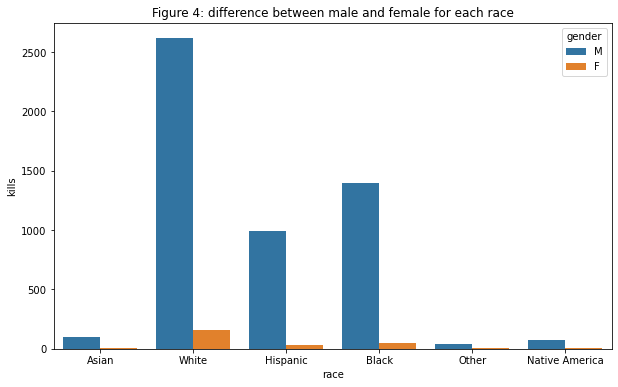

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='race', hue='gender', data=kills) #plotting the kills among 'races', marking the difference between genders
plt.ylabel('kills')
plt.title('Figure 4: difference between male and female for each race')

Now, I want to find how many kills for each 'race' have been recorded by police officers with the body camera!

Figure 5 shows that the body camera was held only few times. No evidence of racism were found!

Text(0.5, 1.0, 'Figure 5: body camera recorded kills per race')

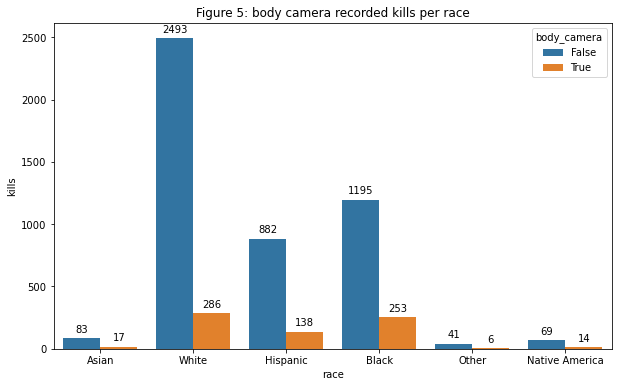

In [64]:
plt.figure(figsize=(10,6))
c = sns.countplot(x='race', hue='body_camera', data=kills) 
for p in c.patches:
    c.annotate(format(p.get_height()), 
       (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', 
       xytext = (0, 9), 
       textcoords = 'offset points')
plt.ylabel('kills')
plt.title('Figure 5: body camera recorded kills per race')

Now, let's create a dataframe that contains data about the signs of mental illness (true or false), the level of the threat (attack, other or undetermined) and body camera (true or false), for the cases of black victims.


In [47]:
#a = kills.groupby(['date','race','signs_of_mental_illness','threat_level' ,'body_camera']).count()['armed']
kills_2=kills.reset_index()
a = kills_2[['date','race', 'signs_of_mental_illness', 'threat_level','body_camera']]

a=a.set_index('date')
a.head()

,race,signs_of_mental_illness,threat_level,body_camera
date,,,,
2015-01-02,Asian,True,attack,False
2015-01-02,White,False,attack,False
2015-01-03,Hispanic,False,other,False
2015-01-04,White,True,attack,False
2015-01-04,Hispanic,False,attack,False


In [48]:
a['race'] = a['race'].fillna(0.0)
k= pd.get_dummies(a.race) #create a new DF with only the count of kills for each race

In [49]:
ak = pd.merge(a,k, on='date')

The visual analysis of the figure 6a, 6b and 6c highlighted that police killed a highest number of people with not using the body camera; further, in the majority of the cases the victims didn't demonstrate insanity problems of the victims, despite the policemen affirmed to be under attack.
Similarly, if we enlarge the analysis to the white kills, we found no different results in the comparison with black victims and then, isn't possible to define the prejudge of the police.

Hereby, it is assumable that police always prefers to kill without the confirmation of the camera and therefore, without the proof of mental instability or threats. 
Indeed, the difference between the kills occurred without the camera (data = false) is significantly higher than the difference between the killings with a camera (data = true), both for cases of mental illness and level of threat.

Since, this representation of data don't show racial bias, these data can be possibly interpreted a form of abuse of power.

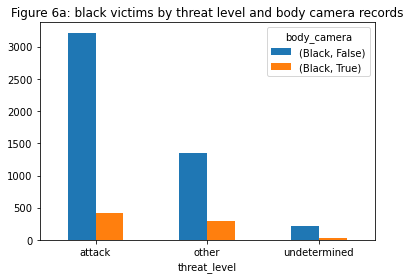

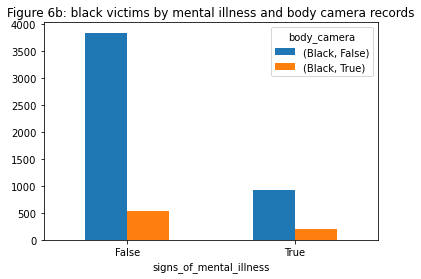

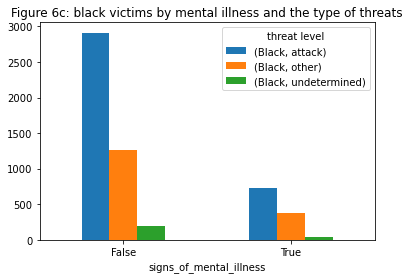

In [239]:
#black cases
ak.groupby(['threat_level', 'body_camera']).agg({'Black':lambda x: np.sum(x)}).unstack().plot.bar()
plt.title('Figure 6a: black victims by threat level and body camera records')
plt.xticks(rotation=0)
plt.legend(title='body_camera')
ak.groupby(['signs_of_mental_illness', 'body_camera']).agg({'Black':lambda x: np.sum(x)}).unstack().plot.bar()
plt.title('Figure 6b: black victims by mental illness and body camera records')
plt.xticks(rotation=0)
plt.legend(title='body_camera')
ak.groupby(['signs_of_mental_illness', 'threat_level']).agg({'Black':lambda x: np.sum(x)}).unstack().plot.bar()
plt.title('Figure 6c: black victims by mental illness and the type of threats')
plt.xticks(rotation=0)
plt.legend(title='threat level')


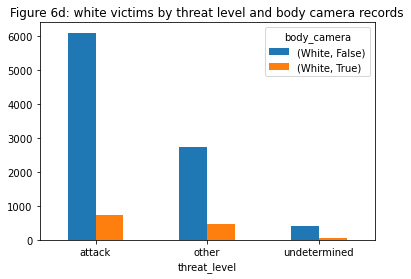

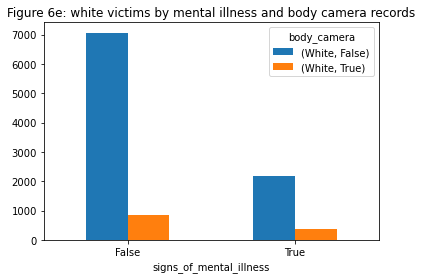

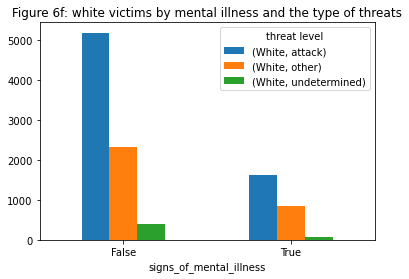

In [51]:
#white cases
ak.groupby(['threat_level', 'body_camera']).agg({'White':lambda x: np.sum(x)}).unstack().plot.bar()
plt.title('Figure 6d: white victims by threat level and body camera records')
plt.xticks(rotation=0)
plt.legend(title='body_camera')
ak.groupby(['signs_of_mental_illness', 'body_camera']).agg({'White':lambda x: np.sum(x)}).unstack().plot.bar()
plt.title('Figure 6e: white victims by mental illness and body camera records')
plt.xticks(rotation=0)
plt.legend(title='body_camera')
ak.groupby(['signs_of_mental_illness', 'threat_level']).agg({'White':lambda x: np.sum(x)}).unstack().plot.bar()
plt.title('Figure 6f: white victims by mental illness and the type of threats')
plt.xticks(rotation=0)
plt.legend(title='threat level')

Now, describe the age of the people killed among the groups!    

The greatest difference between age max and age min is own by white people.
Curiously, the interval between max and min is very similar for asian, black and hispanic, despite that the median is different (figure 7)

C:\Users\busse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Figure 7: age boxplot')

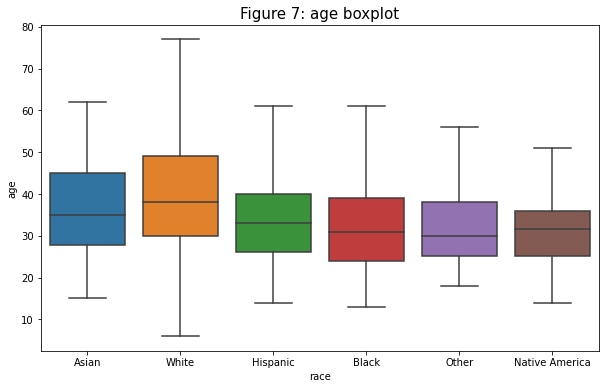

In [12]:
plt.figure(figsize=(10,6))#boxplot shows: max, min, median, 1st and 3rd quartile 
sns.boxplot('race', 'age', data=kills, showfliers=False)#remove outliers
plt.title('Figure 7: age boxplot', fontsize=15)

The youngest person killed was Jeremy Mardis: he wasn't black but he was so young! Very sad.
Here's the fact: https://en.wikipedia.org/wiki/Shooting_of_Jeremy_Mardis

In [23]:
kills.loc[kills['age'].idxmin()] 

id                                   980
name                       Jeremy Mardis
manner_of_death                     shot
armed                            unarmed
age                                    6
gender                                 M
race                               White
city                          Marksville
state                                 LA
signs_of_mental_illness            False
threat_level                       other
flee                                 Car
body_camera                         True
longitude                         -92.05
latitude                          31.125
is_geocoding_exact                  True
Name: 2015-11-03 00:00:00, dtype: object

Let's see the kills by the age intervals (figure 8).
The highest number of murders happened to people who were between 30 and 34 years old.

In [10]:
bins = ['0-4','5-9', '10-14','15-19','20-24','25-29','30-34',
         '35-39','40-44','45-49', '50-54', '55-59', 
        '60-64', '65-69', '70-100']
kills_1['age_bins'] = pd.cut(x=kills_1['age'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100], 
                           labels=bins)
#create new columns with age intervals
kills_1=kills_1.dropna()

Text(0, 0.5, 'kills')

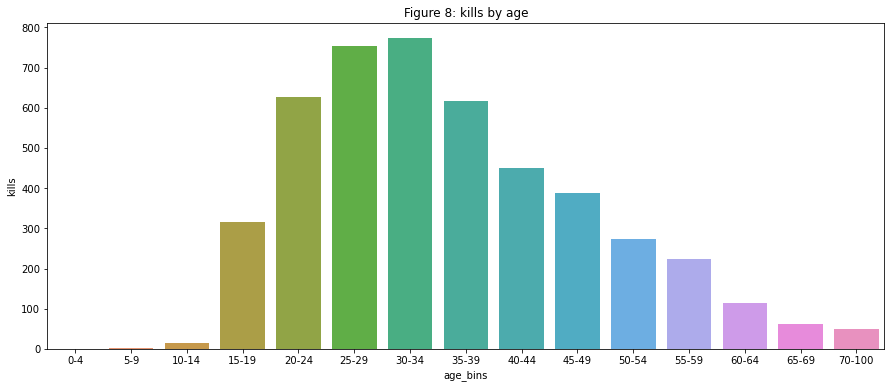

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x='age_bins', data=kills_1) #I wanted to plot the intervals to see which range of age is the most killed
plt.title('Figure 8: kills by age')
plt.ylabel('kills')

Let's take a look the age among 'races'.
From the figure 9a, we can exrapolate that black people are the most killed by police
at the youngest age intervals, especially in the 15-19 and in 20-24 intervals. This data can be interpreted as a possible bias, mostly because black community is lower in terms of population size. 
Figure 9b and 9c confirms this assertion.

In the last part of the project I will analyse the rate of kills by age and state, to verify which are the states most involved in young black victims!

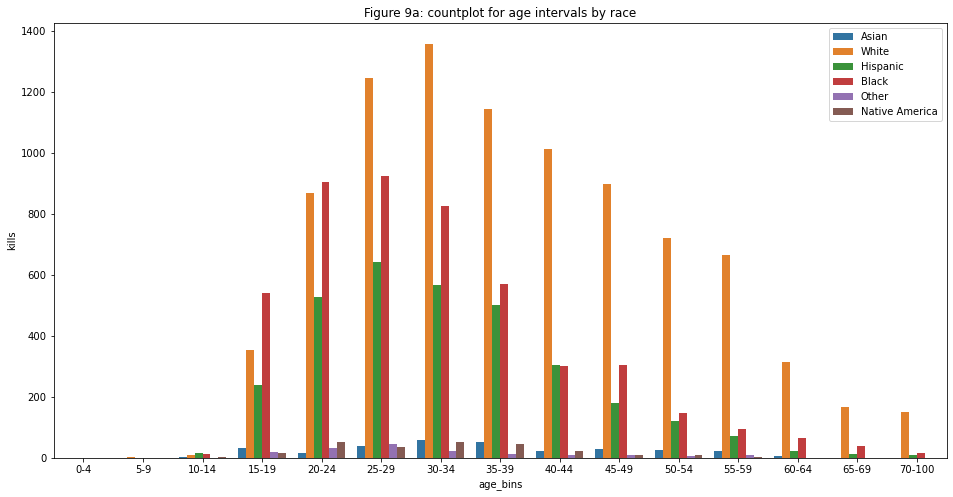

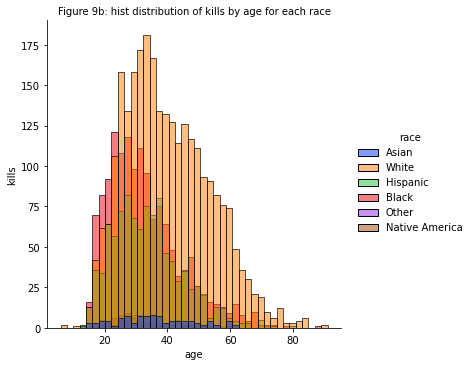

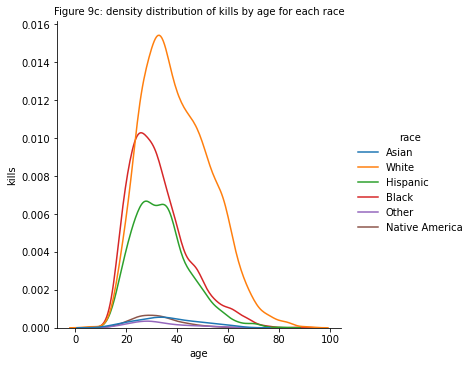

In [25]:
plt.figure(figsize=(16,8))
sns.countplot(data=kills_1, x='age_bins', hue='race')
plt.title('Figure 9a: countplot for age intervals by race')
plt.legend(loc='upper right') 
plt.ylabel('kills')

sns.displot(data=kills, x='age', hue='race', palette="bright" )
plt.title('Figure 9b: hist distribution of kills by age for each race', fontsize=10)
plt.ylabel('kills')

sns.displot(data=kills, x='age', hue='race', kind='kde')
plt.title('Figure 9c: density distribution of kills by age for each race', fontsize=10) 
plt.ylabel('kills')

plt.show()

Which state have the highest number of kills, in terms of absolute numbers? 
California (figure 10)

Text(0.5, 0, 'states')

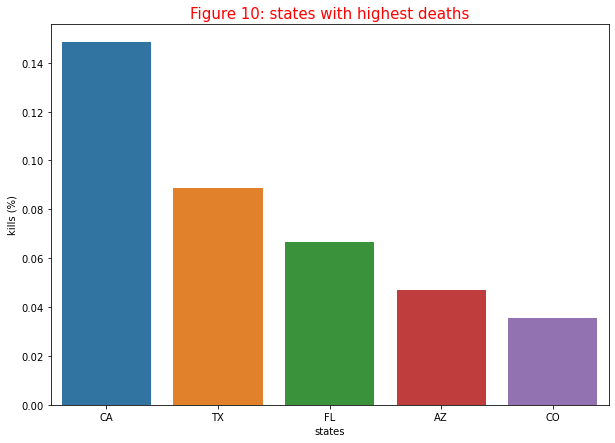

In [235]:
state = kills.state.value_counts(normalize=True) #from absolute frequence to relative
plt.figure(figsize=(10,7))
sns.barplot(x=state[:5].index,y=state[:5].values)
plt.title("Figure 10: states with highest deaths",color="red",fontsize = 15)
plt.ylabel('kills (%)')
plt.xlabel('states')

Hispanic are the group of people with highest number of kills in California (figure 11). Still these are absolute numbers and can't be taken as correct data to describe the kills.

Text(0.5, 1.0, "Figure 11: people killed in California ordered by 'race'")

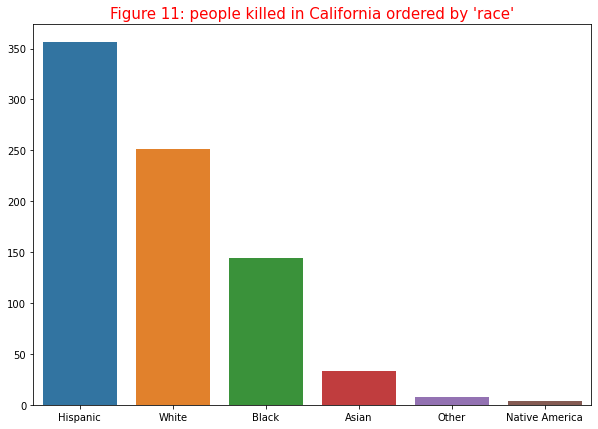

In [18]:
race_by_states = kills[kills['state']=='CA']['race'].dropna().value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=race_by_states.index,y=race_by_states.values)
plt.title("Figure 11: people killed in California ordered by 'race'",color="red",fontsize = 15)

Black is the third group of people hit by police kills.

Which are the states with the highest number of black victims?

California, Florida, Texas, Georgia, Louisiana (figure 12).

Later, in the figure 19, we will see how the cases change if we analyze the rate of black kills per state: in fact, California is the first in terms of absolute number, but not in terms of kills rate.

Text(0, 0.5, 'kills')

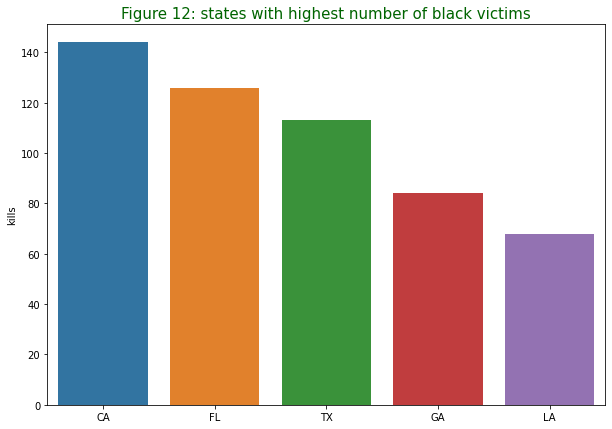

In [11]:
black_states = kills[kills['race']=='Black']['state'].dropna().value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=black_states.index[:5],y=black_states.values[:5]) #choose the first 5 states
plt.title("Figure 12: states with highest number of black victims", color='darkgreen',fontsize = 15)
plt.ylabel('kills')

Which californian city has the sad record of blacks killed by police (in absolute numbers)? Los Angeles (figure 13)

Text(0.5, 0, 'city')

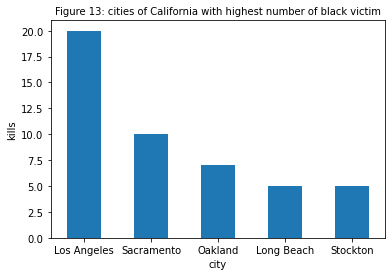

In [12]:
kills[(kills['race']=='Black')&(kills['state']=='CA')]['city'].value_counts().head().plot(kind='bar', ylabel='kills')
plt.title('Figure 13: cities of California with highest number of black victim', fontsize='10')
plt.xticks(rotation=0) #set the rotation of x-axis text
plt.xlabel('city')

Now, let's find out the percentage of armed people!

90% of people killed held a weapon, 6.4% were unarmed, while 3.4% held a toy weapon (figure 14).

This result partially responded to the previous question: are the officers afraid or they act with abuse of power?

The below graph may explain that they have been threated; anyway, the previous analysis (fig 6a and 6d) showed that the greatest part of supposed attacks by the criminals haven't been recorded and thus, the attack can't be proven by clear images.

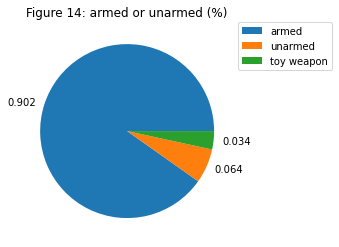

In [13]:
def armed_or_not(x): # in this case I wanted to create a function to apply to 'race' series
    if x != 'unarmed' and x != 'toy weapon':
        return 'armed'
    if x == 'toy weapon':
        return 'toy weapon'
    else:
        return 'unarmed'
    
armed_or_not = kills.armed.apply(armed_or_not).value_counts(normalize=True).round(decimals=3) #relative frequence (%) and reduce decimals
plt.pie(x= armed_or_not.values, labels= armed_or_not.values ) #I did a pie chart: an other method to visualize
plt.title('Figure 14: armed or unarmed (%)')
plt.legend(armed_or_not.index, bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

Now, let's take a look how the people were armed, anlyzing the differences among 'races' (figure 15).

The figure below shows how the police had a racial bias.
In fact, white has the lowest rate of kills when unarmed.

In [196]:
armed = ['unarmed' if i == 'unarmed' else 'toy weapon' 
         if i=='toy weapon' else 'armed' for i in kills.armed]
df_armed = pd.DataFrame({'level_of_threat': armed,
                   'race':kills.race}) 
kills_3= df_armed.groupby('race').count()
kills_3.columns= ['kills_per_race']
kills_3 = kills_3.reset_index()

In [181]:
unarmed = df_armed.loc[df_armed.level_of_threat=='unarmed'].groupby('race').count().values
armed = df_armed.loc[df_armed.level_of_threat=='armed'].groupby('race').count().values

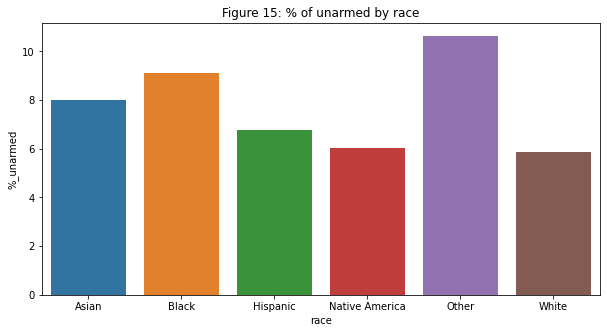

In [195]:
kills_4 = pd.DataFrame({'race':kills_3.race,
                      'kills_per_race':kills_3.kills_per_race})
kills_4['unarmed'] = unarmed
kills_4['armed'] = armed
kills_4['%_unarmed'] = kills_4.unarmed/kills_4.kills_per_race*100
kills_4['%_armed'] = kills_4.armed/kills_4.kills_per_race*100

plt.figure(figsize=(10,5))
sns.barplot(x='race', y='%_unarmed', data=kills_4)
plt.title('Figure 15: % of unarmed by race')
plt.show()

Down below I created a new dataframe that contains the cases per race and the US subcultures population size; the latter has been obtained from: 
https://statisticalatlas.com/United-States/Race-and-Ethnicity.

I took the average relative percent of each subculture (white, black, hispanic, native american, asian and other ) from 2015-2019

In [197]:
count = kills.race.value_counts(normalize=True) #percentage of kill cases
count.index = ['White', 'Black', 'Hispanic', 'Asian', 'Native American', 'Other']

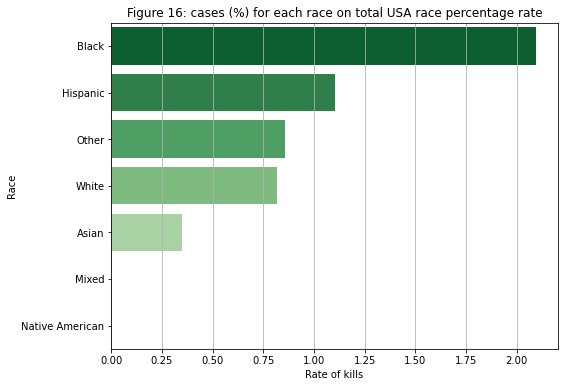

In [202]:
share_race_usa = pd.Series([62.0, 12.6, 2.3, 5.2, 16.9, 1.0],  #percentage of each race on US total popolation 
                                index=['White','Black','Mixed','Asian','Hispanic','Other'])

count_races = count / share_race_usa *100 #relative frequence of cases based on total USA race percentage rate
count_races = count_races.sort_values(ascending=False) #let's order the rate from the highest to the lowest

f, ax = plt.subplots(1,1, figsize=(8,6))
sns.barplot(y=count_races.index, x=count_races.values, palette='Greens_r') #palette to give to the bars a green shade
ax.set(xlabel='Rate of kills', ylabel='Race',
       title='Figure 16: cases (%) for each race on total USA race percentage rate')
ax.grid(True, axis='x') #insert the grid for a better visualization

Despite all the previous analysis showed that white were the most killed, this new relative perspective give us an evidence of probable racial bias. BLACKS HAVE THE GREATEST RATE OF KILLS. 
White people occupy the fourth place in the 'killed by police' ranking; hispanic appears to be second to blacks, which may possibly confirm the racial prejudge.


# Is there any poverty or educational bias?  

In order to discover some more reason about these murders, I am going to analyze other social factors such as poverty and highschool completion.


Let's import the database with rate of poverty and percentage of people above 25 years old who completed high school.
The poverty rate is an index to calculate the proportion of people living below the poverty line. 
A poverty rate of 25 percent indicates that 25 people are categorized as poor, among a population of 100.
Percentage of people over 25 who completed highschool indicates that the higher the rate, the greater the population who completed the highschool.

In [207]:
poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv',
                      encoding='iso-8859-1')
highschool = pd.read_csv('PercentOver25CompletedHighSchool.csv', 
                     encoding='iso-8859-1')

Let's merge the dataframes...

In [208]:
new_df = pd.merge(poverty,highschool) #merge the first two imported dataframes
new_df.columns = ['state','city','poverty_rate','percent_completed_hs'] #rename the columns

In [209]:
rmv_idx = new_df[['state','city']][new_df[['state','city']].duplicated()].index #identified the duplicate 
new_df = new_df.drop(rmv_idx) #remove the duplicate relying on their index; I need this to substitute the 'city' and 'state'.
new_df['city'] = new_df['city'].apply(lambda x: x.rsplit(' ',1)[0]) #remove the name after the empty space for some city 
#for the reason that city names have to be equal in order to substitute the columns
new_df=new_df.replace({'(X)': np.nan,'-': np.nan}) 
new_df=new_df.fillna(0.0) #substitute nan with 0


...and add the 'cases' columns (that counts the cases for each city)!

In [210]:
cases = kills.groupby(['state','city']).count()['id'].reset_index() #grouping cases by state and city from kills dataset
cases.columns = ['state', 'city', 'cases'] #rename 'id' column --> 'cases'

In [211]:
#keep this line in separate cells to avoid the repetitions of columns while run the code
new_df = pd.merge(cases,new_df,on=['state','city'],how='left') #merge dataframes basing on two columns (state, city)

In [212]:
new_df['poverty_rate'] = new_df['poverty_rate'].astype(float)
new_df['percent_completed_hs'] = new_df['percent_completed_hs'].astype(float)
new_df['city'] = new_df['city'].apply(lambda x: x.rsplit(' ',1)[0])
new_df.head() #new_df dataframe has the new column 'cases which represent the number of cases for each city'


,state,city,cases,poverty_rate,percent_completed_hs
0,AK,Anchor,1,10.1,93.8
1,AK,Anchorage,11,8.2,93.0
2,AK,Barrow,1,11.7,84.6
3,AK,Big,1,9.6,90.4
4,AK,Copper,1,18.8,84.8


Load and merge the dataframe with total population by city with the 'new_df' dataframe.

Considering the column 'cases_on_pop_rate', the value 0.25 is equal to 0.25%

In [213]:
population = pd.read_csv('PopulationByCity.csv') #population for each city 
population['city'] = population['city'].apply(lambda x: x.rsplit(' ',1)[0]) #remove part of the name which can impede the correct merge of the names for the column 'city'
population['cases_on_city_pop'] = new_df['cases']/population['population']*100 #percentage rate cases/population per city
population.head()

,city,state,population,lat,lng,cases_on_city_pop
0,Anchor,AK,2057.0,59.7703,-151.7052,0.048614
1,Anchorage,AK,253421.0,61.1508,-149.1091,0.004341
2,Barrow,AK,4178.0,NaN,NaN,0.023935
3,Big,AK,3136.0,61.5260,-149.9721,0.031888
4,Copper,AK,397.0,61.9845,-145.3544,0.251889


In [214]:
merged_data= pd.merge(new_df,population, on=['state','city'],how='left') #merge dataframes basing on two columns (state, city)
merged_data= merged_data.drop_duplicates(subset=['city','state']) #drop duplicate using city and state as 'filter'
merged_data = merged_data.replace({'(X)': np.nan,'-': np.nan}) #substitute eventual 'x' or '-' with nan
merged_data= merged_data.set_index('state').fillna(0)
merged_data.head()

,city,cases,poverty_rate,percent_completed_hs,population,lat,lng,cases_on_city_pop
state,,,,,,,,
AK,Anchor,1,10.1,93.8,2057.0,59.7703,-151.7052,0.048614
AK,Anchorage,11,8.2,93.0,253421.0,61.1508,-149.1091,0.004341
AK,Barrow,1,11.7,84.6,4178.0,0.0000,0.0000,0.023935
AK,Big,1,9.6,90.4,3136.0,61.5260,-149.9721,0.031888
AK,Copper,1,18.8,84.8,397.0,61.9845,-145.3544,0.251889


Down below, I made two scatter plots: figure 17 place the relation between the cases on cities population with the poverty rate and figure 18 the cases on cities population with the percentage of highschool completion.

In both, cases of kills on city population aren't totally related with poverty and highschool completion: in fact, figure 17 shows that most of the kills happened in correspondence of medium/low rate of poverty and figure 18 with medium/high school rate of completion.

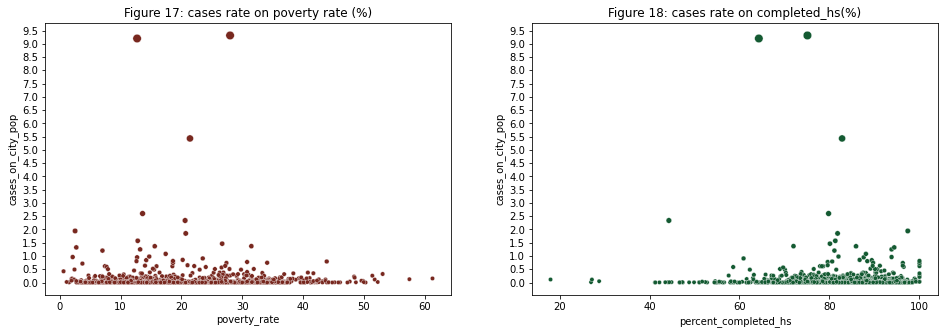

In [216]:
fig, axes = plt.subplots(1,2,figsize=(16, 5))
#choosing cities with more than 1000 inhabitants and data of rate without zeros
sns.scatterplot(y='cases_on_city_pop', x='poverty_rate', 
                data=merged_data[(merged_data.population > 100) &(merged_data.poverty_rate > 0)], ax=axes[0], 
                color='#78281F', size='cases_on_city_pop',legend=False)
sns.scatterplot(y='cases_on_city_pop', x='percent_completed_hs', 
                data=merged_data[(merged_data.population > 100) & (merged_data.percent_completed_hs > 0)], ax=axes[1], 
                color='#145A32', size='cases_on_city_pop',legend=False) 
 #size is to define the size of the rate
axes[0].set_yticks(np.arange(0, 10, 0.5))
axes[1].set_yticks(np.arange(0, 10, 0.5))
axes[0].set_title('Figure 17: cases rate on poverty rate (%)')
axes[1].set_title('Figure 18: cases rate on completed_hs(%)')

plt.show()

In [218]:
merged_data[['poverty_rate', 'percent_completed_hs', 'cases_on_city_pop' ]].corr() #check the correlation

,poverty_rate,percent_completed_hs,cases_on_city_pop
poverty_rate,1.000000,0.549730,-0.004053
percent_completed_hs,0.549730,1.000000,-0.001364
cases_on_city_pop,-0.004053,-0.001364,1.000000


Now, let's create a new dataframe with the total black kills per state

In [248]:
kills['race'] = kills['race']
num_cases_black_state = pd.get_dummies(kills.race) #create a new DF with only the count of kills for each race
num_cases_black_state['state'] = kills.state
num_cases_black_state = num_cases_black_state.groupby('state').sum().reset_index()
num_cases_black_state
num_cases_black_state.columns = ['state','asian','tot_black_kills','hispanic','native_american','other','white']
# I am going to keep only the black cases
num_cases_black_state=num_cases_black_state.drop(columns=['asian','hispanic','native_american','other','white'])
num_cases_black_state.sort_values(by=['state']) #alphabetically ordering
ix= num_cases_black_state[num_cases_black_state['tot_black_kills']==0.0].index #remove state with 0 kills
num_cases_black_state = num_cases_black_state.drop(ix) #drop 0.0s


Importing the dataset on total black population for each state.

Here's the source: https://worldpopulationreview.com/state-rankings/black-population-by-state

In [249]:
pop_black = pd.read_csv('PopBlack.csv')
pop_black.columns=['state', 'tot_pop_black', 'rate_pop_black_state']
pop_black= pop_black.sort_values('state')
pop_black= pop_black.drop(columns=['rate_pop_black_state'])
pop_black.head()

,state,tot_pop_black
1,AK,35935
0,AL,1340980
2,AR,405266
3,AZ,489192
4,CA,2766480


Let's merge the two previous dataframe

In [250]:
pop_black = pd.merge(pop_black,num_cases_black_state)
#calculate the rate of black kills per state
pop_black['kills_rate_black'] = pop_black['tot_black_kills']/pop_black['tot_pop_black']*100 
pop_black = pop_black.sort_values('kills_rate_black', ascending=False)
pop_black.head()

,state,tot_pop_black,tot_black_kills,kills_rate_black
24,MO,11278,54.0,0.478808
18,LA,26929,68.0,0.252516
43,WI,9770,22.0,0.225179
26,NC,26761,55.0,0.205523
39,TX,55472,113.0,0.203706


According to the data, the state which have the highest rate of black kills is Missouri (MO)

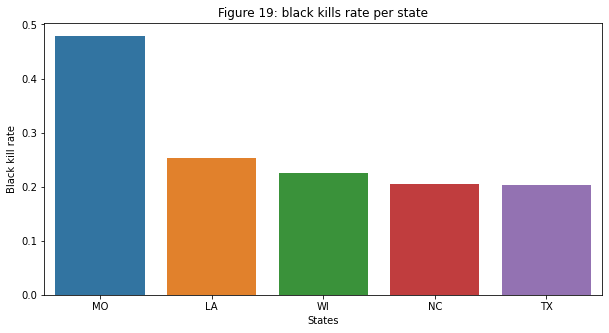

In [251]:
plt.figure(figsize=(10,5))
sns.barplot(x=pop_black['state'][:5], y=pop_black['kills_rate_black'][:5], data=pop_black)
plt.xlabel('States')
plt.ylabel('Black kill rate')
plt.title('Figure 19: black kills rate per state')  
plt.show()

Nice visualization might be the one on the map (figure 20)!

Down below I represent the states with the greatest rate of black kills.

In [252]:
import plotly.express as px
state_rate = pd.DataFrame({'state': pop_black.state,
                           'kills_rate_black': list(pop_black.kills_rate_black)})

fig = px.choropleth(state_rate, locations='state', locationmode='USA-states', 
                    color='kills_rate_black',
                    range_color=(state_rate.kills_rate_black.min(),
                                 state_rate.kills_rate_black.max()),
                    scope="usa",color_continuous_scale='reds', 
                    labels={'kills_rate_black': 'rate of kills for black population'},
                    title='Figure 20: rate of black cases on state population')

fig.update_layout(title_x = 0.5)
fig.show()

# Is there any political link between the deaths and the police actions?

Downloaded (https://github.com/tonmcg/US_County_Level_Election_Results_08-20) and imported the 2016 US election dataset, and then merged with the previous dataframe 'pop_black'. 
The aim is to define the possible correlation between the rate of black victims and the vote in those state where repubblican's representative, Donald Trump, won in 2016.

In [253]:
US_election_2016 = pd.read_csv(r'2016_US_County_Level_Presidential_Results.csv')
US_election_2016= US_election_2016[['votes_dem', 'votes_gop', 'state_abbr']]#keep columns I need
US_election_2016.columns=['dem', 'rep', 'state'] #rename
US_election_2016=US_election_2016.drop_duplicates() #drop eventual duplicates
US_election_2016= US_election_2016.groupby('state').sum() #group the values by state
US_election_2016=US_election_2016.reset_index().sort_values(by=['state']) #alphabetical sorting
US_election_2016.head()

,state,dem,rep
0,AK,93003.0,130413.0
1,AL,718084.0,1306925.0
2,AR,378729.0,677904.0
3,AZ,936250.0,1021154.0
4,CA,7362490.0,3916209.0


In [254]:
df_final= pd.merge(US_election_2016, pop_black) #merge the black kills rate DF with the one with election results
df_final=df_final.sort_values(by=['kills_rate_black'], ascending=False)
#create new column: for each state, if republicans votes > democratics votes: 'rep', else: 'dem'
df_final['win'] = np.where(df_final['rep'] > df_final['dem'], 'rep', 'dem') 
df_final.head() 

,state,dem,rep,tot_pop_black,tot_black_kills,kills_rate_black,win
24,MO,1054889.0,1585753.0,11278,54.0,0.478808,rep
18,LA,779535.0,1178004.0,26929,68.0,0.252516,rep
43,WI,1380823.0,1403694.0,9770,22.0,0.225179,rep
26,NC,2162074.0,2339603.0,26761,55.0,0.205523,rep
39,TX,3867816.0,4681590.0,55472,113.0,0.203706,rep


The figure 21 shows that the top 8 state as regards the rate of black kills have seen the victory of Trump's party at the 2016 election.
Interestingly, 7 of the 8 last states in the concern of black kills rate have seen the democrats prevail.

The data show that in the states where Trump won, there have been more black people victim of police, rather than in those where democrats prevail.

The police could have acted harder against blacks, who could have been considered more dangerous due to the white supremacism narrative of Trump's supporters. 

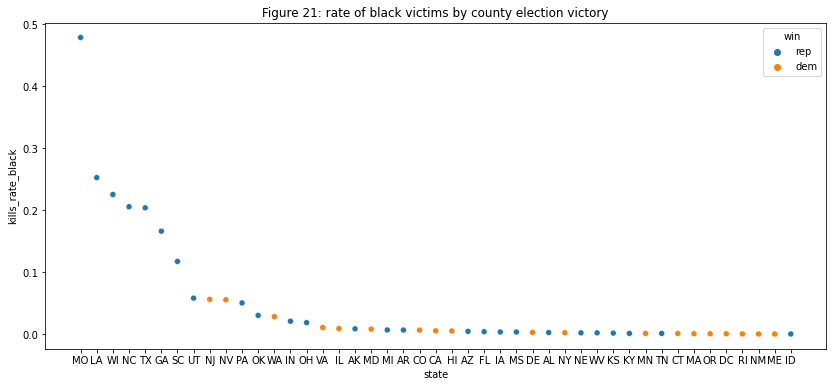

In [256]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_final, x="state", y="kills_rate_black", hue="win")
plt.title('Figure 21: rate of black victims by county election victory')
plt.show()

Finally, I wanted to find a possible correlation between the states with highest number of cases and the lack of school education within the black community.
Data obtained from: https://nces.ed.gov/ccd/tables/ACGR_RE_and_characteristics_2016-17.asp

In [257]:
hs_race = pd.read_csv('hs_race.csv') #import dataset and replace 0.0 with not a number
hs_race=hs_race.replace(0.0, np.nan)

In [258]:
hs_race.loc[-1] = hs_race.mean().round(2)  # adding a row with the US average percent of students 
hs_race = hs_race.sort_index()

In [259]:
hs_race['state'] = hs_race['state'].replace(np.nan, 'Mean')
hs_race.head() #dataframe below shows how black community have a low student percentage

,state,american indian,asian,hispanic,black,white
-1,Mean,74.72,90.66,78.39,77.14,87.84
0,AL,NaN,NaN,88.00,86.50,91.00
1,AK,69.00,88.00,77.00,74.00,82.20
2,AR,66.80,NaN,74.50,73.80,82.80
3,AZ,89.00,92.00,85.70,83.40,90.00


Down below (figure 22), I plotted the states with the lowest (under the 'mean' threshold) percentage of black students.
Since my previous analysis uncovered that YOUNG black guys are the most killed among the other groups, I wanted to find which state have the lowest rate of black students.

Among the states with the percent of student below the national average, I found that 4 of them have had the victory of Trump; further, those 4 counties are found within the 8 states with highest rate of black deaths. 

Students who do not attend school might stand in the street and possibly act in a criminal way (or supposed so).
This fact could be felt as a threat by local population, who then voted for the nationalist and white supremacist Donald Trump. Maybe, the police officers, whom are part of the local population could have felt the same and therefore, force their action towards young blacks.




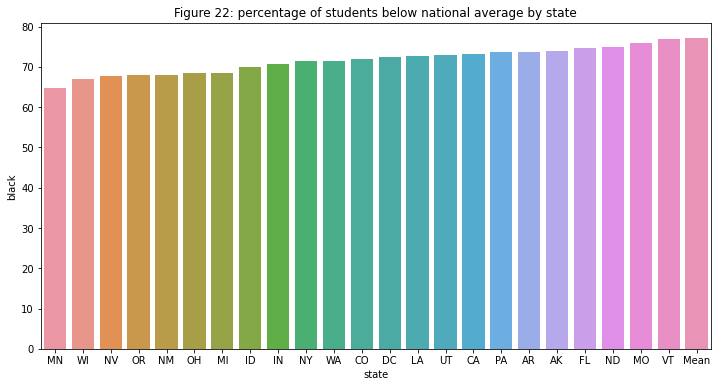

In [260]:
hs_race=hs_race.sort_values(by=['black'], ascending=True)
plt.figure(figsize=(12,6))
sns.barplot(data=hs_race, x=hs_race['state'][:24], y="black")
plt.title('Figure 22: percentage of students below national average by state')
plt.show()

In order to confirm the previous assertion, I decided to find which are the top 10 states involved in young black cases.
Indeed, in the next analysis I took the age intervals (15-19 and 20-24), which I previously encounted to have the highest number of black guys killed, and performed an age analysis by 'race' and state. 

After the upload of the datset from https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-detail.html, 
I defined a new dataframe about age intervals per state: then, I calculated the rate of black young victims for each state.


In [261]:
age_df = pd.read_csv('sc-est2019-alldata5.csv')
age_df = age_df[['NAME', 'RACE', 'AGE', 'POPESTIMATE2019']]
age_df.columns = ['state', 'race', 'age', 'population']
age_df['race']= np.where(age_df['race']==2, 'black', 'others') #just find black people. Other races named as 'others'
#age_df = age_df.groupby('state')['age'].mean()
ixx = age_df[age_df['race'] == 'others'].index
age_df.drop(ixx, inplace=True) #drop columns without black mates
age_df.head()


,state,race,age,population
86,Alabama,black,0,19322
87,Alabama,black,1,19511
88,Alabama,black,2,19075
89,Alabama,black,3,19109
90,Alabama,black,4,19508


In [262]:
b = ['0-4','5-9', '10-14','15-19','20-24','25-29','30-34',
         '35-39','40-44','45-49', '50-54', '55-59', 
        '60-64', '65-69', '70-100']
age_df['age'] = pd.cut(x=age_df['age'], #create column with age intervals
                             bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100], 
                             labels=b)
age_df = age_df.groupby(['age','state'])['population'].sum().reset_index() #create new DF with the population size of states for each age interval
age_df.head()


,age,state,population
0,0-4,Alabama,384380
1,0-4,Alaska,15388
2,0-4,Arizona,155916
3,0-4,Arkansas,165692
4,0-4,California,809780


In [263]:
#creating two subdataframes about 15-19 and 20-24 intervals, which I found to have greater number of deaths in black community
age_df_1 = age_df[(age_df.age  == "15-19")]
age_df_2 = age_df[(age_df.age  == "20-24")]
age_df_1.columns = ['age_15-19', 'state', 'population_15-19']
age_df_2.columns = ['age_20-24', 'state', 'population_20-24']

In [264]:
age_df_final = pd.merge(age_df_1, age_df_2, on=['state']) #merge the subdataframes

#change whole name of states with abbreviation
data=np.array([ 'AL','AK', 'AR', 'AZ', 'CA', 'CO', 'CT',  'DE', 'DC', 'FL', 'GA', 'HI',  'ID', 'IL', 'IN', 'IA',
               'KS', 'KY', 'LA', 'ME','MD', 'MA', 'MI',  'MN', 'MS', 'MO',  'MT', 'NE',  'NV',   'NH', 'NJ', 'NM','NY','NC',   
                 'ND',   'OH',  'OK',  'OR',  'PA',  'RI',  'SC',  'SD',  
                'TN', 'TX', 'UT',  'VT', 'VA', 'WA', 'WV','WI',  'WY'], dtype='O')
a = pd.DataFrame({'state': data})   
age_df_final = age_df_final.assign(state=a['state']) 

#move 'state' column to 0 position
first_column = age_df_final.pop('state') 
age_df_final.insert(0, 'state', first_column) 
age_df_final.head()

,state,age_15-19,population_15-19,age_20-24,population_20-24
0,AL,15-19,409952,20-24,416840
1,AK,15-19,13428,20-24,16484
2,AR,15-19,154776,20-24,161280
3,AZ,15-19,159188,20-24,160768
4,CA,15-19,877880,20-24,973048


In [265]:
#in order to calculate the rate of kills I'll avail of previous DF kills_1 which have the count of black victims and age interval
kills_by_age_1=kills_1.loc[(kills_1['age_bins']== '15-19') &
            (kills_1['race']== 'Black')].groupby(['state'])['Black'].count().reset_index()
kills_by_age_1.columns=['state', 'kills_by_age_15-19'] #create the column with the count of victims per the age 15-19 
kills_by_age_2 = kills_1.loc[(kills_1['age_bins']== '20-24') &
            (kills_1['race']== 'Black')].groupby(['state'])['Black'].count().reset_index()
kills_by_age_2.columns=['state', 'kills_by_age_20-24']#create the column with the count of victims per the age 20-24

kills_by_age= pd.merge(kills_by_age_1, kills_by_age_2) #merge the above DF
age_df_final = pd.merge(age_df_final, kills_by_age) #finally merge with pop size DF

age_df_final['kills_rate_15-19'] = age_df_final['kills_by_age_15-19']/age_df_final['population_15-19']*100 #rate of kills
age_df_final['kills_rate_20-24'] = age_df_final['kills_by_age_20-24']/age_df_final['population_20-24']*100 #rate of kills
age_df_final.head()

,state,age_15-19,population_15-19,age_20-24,population_20-24,kills_by_age_15-19,kills_by_age_20-24,kills_rate_15-19,kills_rate_20-24
0,AL,15-19,409952,20-24,416840,17,9,0.004147,0.002159
1,AR,15-19,154776,20-24,161280,16,2,0.010338,0.001240
2,AZ,15-19,159188,20-24,160768,20,5,0.012564,0.003110
3,CA,15-19,877880,20-24,973048,26,96,0.002962,0.009866
4,CO,15-19,108588,20-24,115512,16,31,0.014735,0.026837


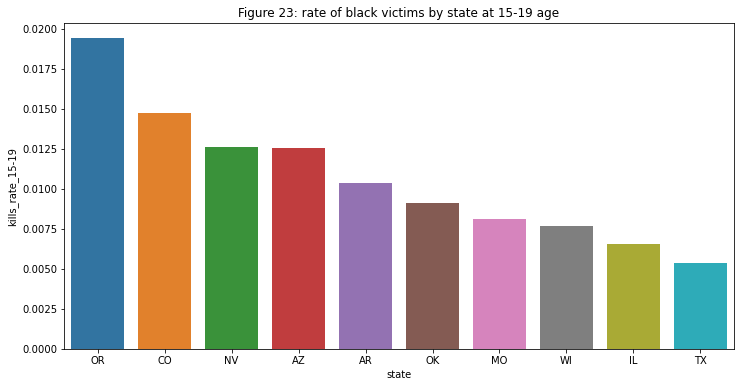

In [266]:
a = age_df_final.sort_values(by=['kills_rate_15-19'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=a, x=a['state'][:10], y="kills_rate_15-19")
plt.title('Figure 23: rate of black victims by state at 15-19 age')
plt.show()

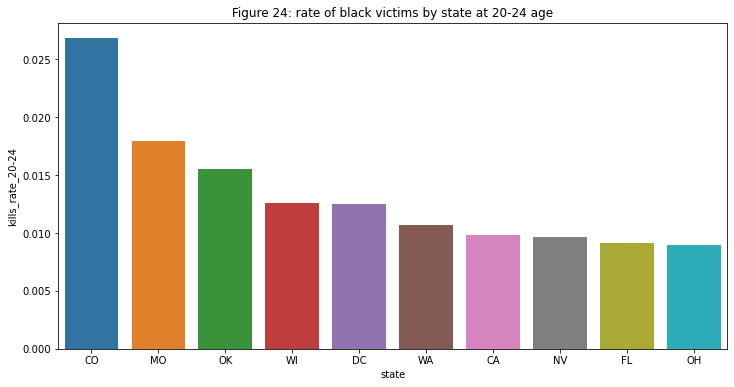

In [267]:
a1 = age_df_final.sort_values(by=['kills_rate_20-24'],ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=a1, x=a1['state'][:10], y="kills_rate_20-24")
plt.title('Figure 24: rate of black victims by state at 20-24 age')
plt.show()

The evidence have let me unravel that the highest rate black kills in the 15-19 interval (figure 23) occurred in 6 states (OR, CO, AR, MO, NV, WI) which are positioned below the US student's average percentage. 
In the figure 24, Oklahoma, is the only state to be above the national black student average; the rest 9 states are below that threshold.
Furthermore, Missouri (MO) and Winsconsin (WI), which are at top 3 for preferring Trump in 2016 US elections, have found to be at the top 10 for the rate of black kills at 15-19 and 20-24 age.

These results let me assume that the lack of school may have led to more victims. 
The data confirmed my previous assertion: not attending the school can lead guys in the street and therefore, to uncorrect behaviour. 
In fact, these street behaviours could be felt as a threat and could let the police to act stronger against them. 







Conclusions:

1- The data about the rate of kills on the population size says that black community is the most involved in the cases of death by the hand of police.

2- Given that black boys are the most killed at young age in comparison with other races and that, 2 of Trump's top 3 winning states are in the top 10 for young black victims rate, the police may have acted with a racial prejudice.

3-Afterall, data may suggests that the improve of school policy towards black community may lead to a decrease of victims.